In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Simulation and statistics functions

This section of the code handles the core statistical simulation and analysis. It generates synthetic data representing packet losses in a network using a binomial distribution, computes the expected value based on theoretical probability, and extracts key statistical metrics such as average, minimum, maximum, and standard deviation of the simulated losses. These components form the foundation for comparing simulated results with theoretical expectations.

In [24]:
def simulate_packet_losses(num_experiments, packets_per_experiment, loss_probability):
    np.random.seed(42)
    return np.random.binomial(n=packets_per_experiment, p=loss_probability, size=num_experiments)

def calculate_binomial_expected_value(p, n):
    return n * p

def compute_statistics(losses):
    statistics = {
        "avg": np.mean(losses),
        "min": np.min(losses),
        "max": np.max(losses),
        "std_dev": np.std(losses)
    }

    return statistics

## Display functions
This section prints simulation statistics and visualizes the results. It displays key statistics such as average loss, standard deviation, and the min/max losses. Additionally, it generates two plots: a histogram of packet losses and a convergence chart showing how the average loss approaches the expected value as experiments progress.

In [25]:
def print_statistics(statistics, trials, expected_loss):
    print("\n----- Simulation Summary -----")
    print(f"Total trials: {trials}")
    print(f"Expected loss per experiment: {expected_loss}")
    print(f"Average simulated loss: {statistics['avg']:.2f}")
    print(f"Standard deviation: {statistics['std_dev']:.2f}")
    print(f"Min loss: {statistics['min']} | Max loss: {statistics['max']}")

def plot_histogram(losses, expected_loss):
    plt.figure(figsize=(7, 7))
    plt.hist(losses, bins=range(min(losses), max(losses) + 2), edgecolor='black', align='left')
    plt.axvline(x=expected_loss, color='red', linestyle='--', label=f'Expected Loss = {int(expected_loss)}')
    plt.title("Packet Loss per Experiment")
    plt.xlabel("Number of Lost Packets")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_convergence(losses, packets_per_experiment, loss_probability):
    running_avg = np.cumsum(losses) / (np.arange(len(losses)) + 1)
    plt.figure(figsize=(7, 7))
    plt.plot(running_avg, label="Running Average Loss")
    plt.axhline(y=packets_per_experiment * loss_probability, color='red', linestyle='--', label='Expected Loss')
    plt.title("Convergence of Average Loss Across Experiments")
    plt.xlabel("Experiment Number")
    plt.ylabel("Average Lost Packets")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [26]:
def simulate(num_experiments, packets_per_experiment, loss_probability):
    print("Simulating network packet loss...")
    losses = simulate_packet_losses(num_experiments, packets_per_experiment, loss_probability)
    statistics = compute_statistics(losses)
    expected_loss = calculate_binomial_expected_value(loss_probability, packets_per_experiment)
    print_statistics(statistics, num_experiments, expected_loss)
    plot_histogram(losses, expected_loss)
    plot_convergence(losses, packets_per_experiment, loss_probability)

In the main function the simulation is repeated 3 times with 100, 1000, 10000 repeats in each time.

In [27]:
def main():
    simulations = [
        (1000, 0.02, 100),
        (1000, 0.02, 1000),
        (1000, 0.02, 10000),
    ]

    for packets_per_experiment, loss_probability, trials in simulations:
        simulate(trials, packets_per_experiment, loss_probability)

Simulating network packet loss...

----- Simulation Summary -----
Total trials: 100
Expected loss per experiment: 20.0
Average simulated loss: 19.53
Standard deviation: 4.37
Min loss: 10 | Max loss: 30


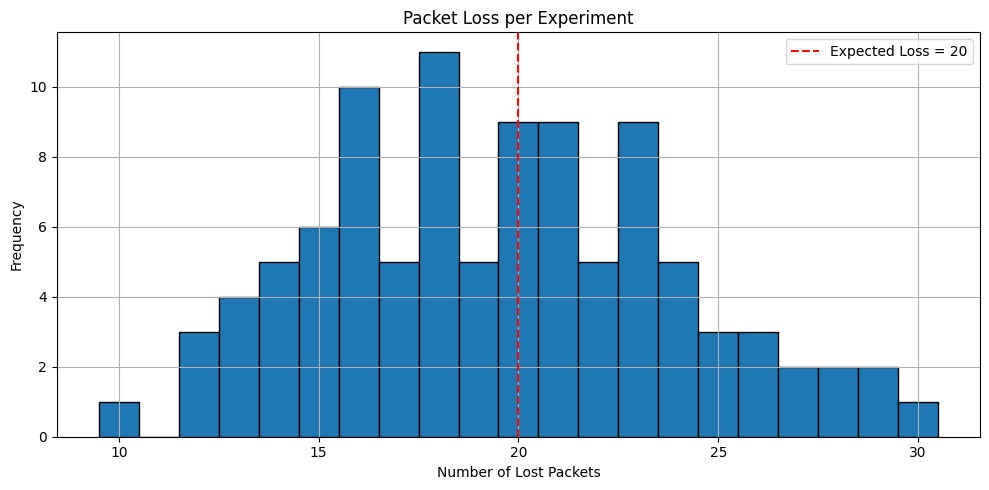

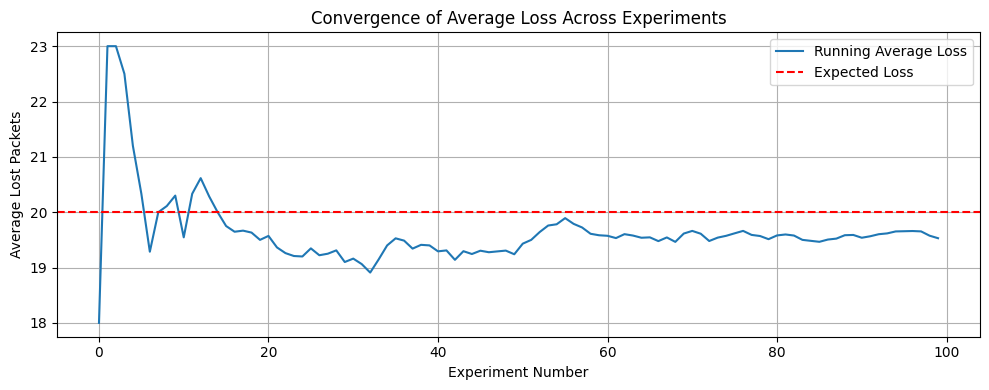

Simulating network packet loss...

----- Simulation Summary -----
Total trials: 1000
Expected loss per experiment: 20.0
Average simulated loss: 19.86
Standard deviation: 4.43
Min loss: 9 | Max loss: 37


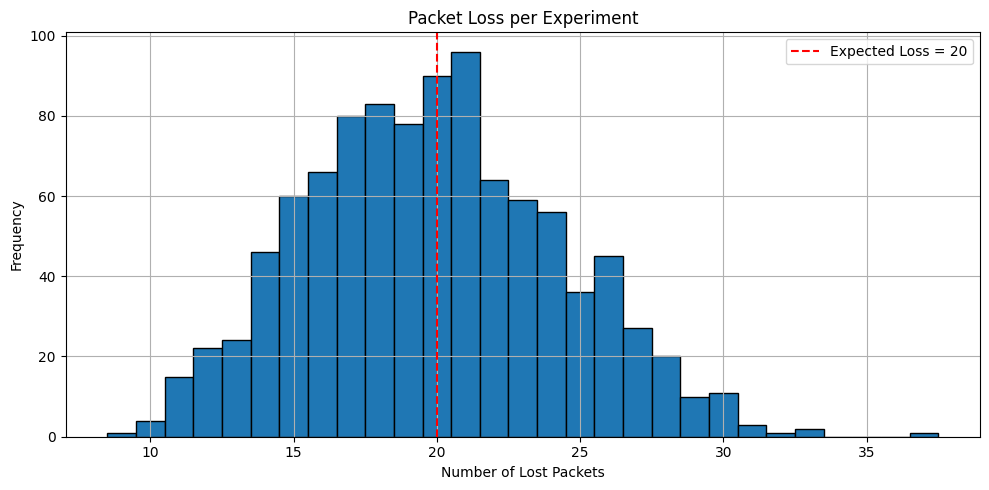

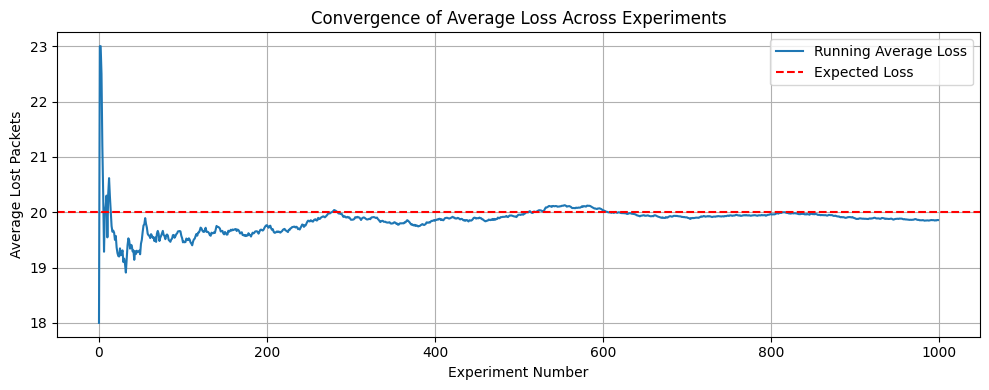

Simulating network packet loss...

----- Simulation Summary -----
Total trials: 10000
Expected loss per experiment: 20.0
Average simulated loss: 19.91
Standard deviation: 4.38
Min loss: 4 | Max loss: 37


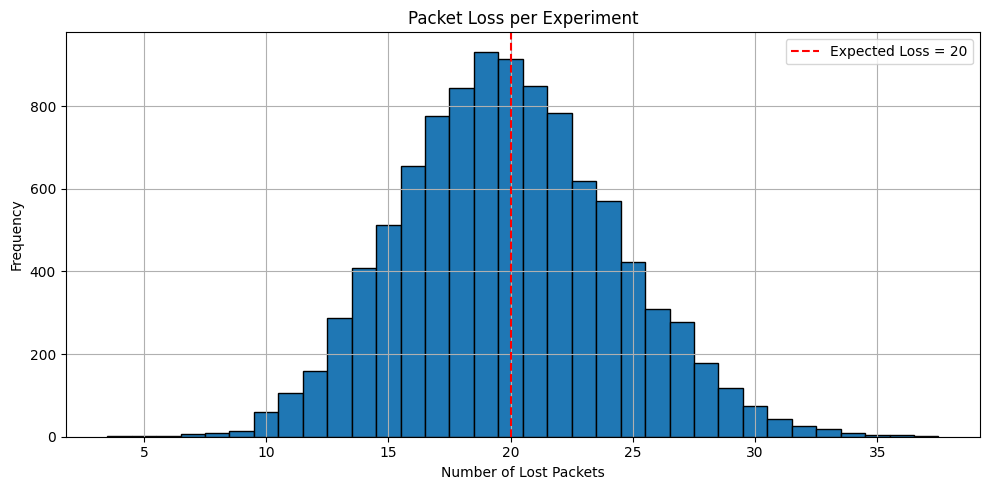

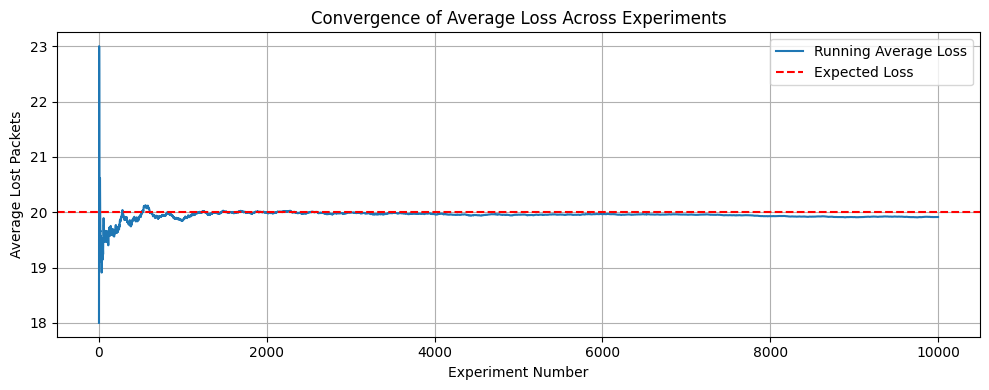

In [28]:
if __name__ == "__main__":
    main()